In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,top_k_accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import shap
import keras 
from keras.utils.np_utils import to_categorical
from keras import backend as K
#import librosa.display
from lime.lime_tabular import LimeTabularExplainer
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation,Conv2D,MaxPool2D,Flatten,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import LabelEncoder
from skimage.io import imread, imshow
from skimage.transform import resize
from glob import glob
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.callbacks import ModelCheckpoint

In [6]:
file_path=glob("IDC_regular_ps50_idx5/*/*")
class0=[]
class1=[]
for i in file_path:

    h=glob(i+"/"+"*")
    if i.endswith("0"):
        
        for j in h:
            class0.append(j)
    else:
        
        for j in h:
            class1.append(j)

    


In [7]:
sample1=random.sample(class0,18786)#18786
sample2=random.sample(class1,18786)

In [8]:
len(sample2)

18786

In [9]:
def feature_extract(path,class_name):
    val=[]
    for i in path:
        image_data=imread(i)
        image_size=resize(image_data,(50,50))
        val.append([image_size,class_name])
    
    return val



In [10]:
non_breast_cancer=feature_extract(sample1,"non_breast_cancer")

In [11]:
breast_cancer=feature_extract(sample2,"breast_cancer")

In [12]:
len(breast_cancer)

18786

In [13]:
combined_data=np.concatenate((non_breast_cancer,breast_cancer))
random.seed(42)
random.shuffle(combined_data)


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [14]:
g=0
g1=0
for i in combined_data:
    if i[1]=="non_breast_cancer":
        g1+=1
    else:
        g+=1
print(g)


5792


In [11]:
#dataframe=pd.DataFrame(combined_data)
#dataframe.to_excel("new_img.xlsx")

In [12]:
#for_reading xlsx file
#read_dataframe=pd.read_excel("new_img.xlsx")

In [13]:
#x=read_dataframe[0]
#y=read_dataframe[1]
#y.shape

In [15]:
x=[]
y=[]
for features,class_value in combined_data:
    x.append(features)
    y.append(class_value)

In [16]:
x=np.array(x)


In [16]:
"""
y1=[]
for i in y:
    if i!="non_breast_cancer":
        y1.append(1)
    else:
        y1.append(0)
y1.count(0)
"""

'\ny1=[]\nfor i in y:\n    if i!="non_breast_cancer":\n        y1.append(1)\n    else:\n        y1.append(0)\ny1.count(0)\n'

In [17]:
lb=LabelEncoder()
y=to_categorical(lb.fit_transform(y))
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [18]:
y.shape

(37572, 2)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
y_train.shape

(26300, 2)

In [38]:
x_train.shape
K.clear_session()

In [22]:
'''
num_labels=y.shape[1]
#Dense()
model=Sequential()
###first layer
model.add(Dense(200,input_shape=(1,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
###second layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#fourth layer
model.add(Dense(400))
model.add(Activation('relu'))
model.add(Dropout(0.1))
###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))
'''

"\nnum_labels=y.shape[1]\n#Dense()\nmodel=Sequential()\n###first layer\nmodel.add(Dense(200,input_shape=(1,)))\nmodel.add(Activation('relu'))\nmodel.add(Dropout(0.1))\n###second layer\nmodel.add(Dense(100))\nmodel.add(Activation('relu'))\nmodel.add(Dropout(0.5))\n###third layer\nmodel.add(Dense(200))\nmodel.add(Activation('relu'))\nmodel.add(Dropout(0.2))\n#fourth layer\nmodel.add(Dense(400))\nmodel.add(Activation('relu'))\nmodel.add(Dropout(0.1))\n###final layer\nmodel.add(Dense(num_labels))\nmodel.add(Activation('softmax'))\n"

In [39]:
model=Sequential()
model.add(Conv2D(32,kernel_size=3,activation="relu",input_shape=(50,50,3)))
model.add(Conv2D(64,kernel_size=3,activation="relu"))
model.add(Flatten())
model.add(Dense(2,activation="softmax"))



In [40]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 135424)            0         
                                                                 
 dense (Dense)               (None, 2)                 270850    
                                                                 
Total params: 290,242
Trainable params: 290,242
Non-trainable params: 0
_________________________________________________________________


In [33]:
for layer in model.layers[:-2]:

    layer.trainable=False

    

for layer in model.layers[-2:]:

    layer.trainable=True

In [41]:
model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [42]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 135424)            0         
                                                                 
 dense (Dense)               (None, 2)                 270850    
                                                                 
Total params: 290,242
Trainable params: 290,242
Non-trainable params: 0
_________________________________________________________________


In [43]:
num_epochs =20
num_batch_size =90

checkpointer = ModelCheckpoint(filepath='breast_cancer_classification_v2_cnn.hdf5',
    verbose=1,
    save_best_only=True)


history= model.fit(x_train, y_train,epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)



2022-11-05 14:42:40.168678: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 789000000 exceeds 10% of free system memory.


Epoch 1/20
  1/822 [..............................] - ETA: 16:28 - loss: 0.8392 - accuracy: 0.0938

2022-11-05 14:42:44.270976: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 26813952 exceeds 10% of free system memory.
2022-11-05 14:42:44.503153: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 26813952 exceeds 10% of free system memory.


822/822 [==============================] - ETA: 0s - loss: 0.3616 - accuracy: 0.8544
Epoch 00001: val_loss improved from inf to 0.31196, saving model to breast_cancer_classification_v2_cnn.hdf5
822/822 [==============================] - 169s 204ms/step - loss: 0.3616 - accuracy: 0.8544 - val_loss: 0.3120 - val_accuracy: 0.8653
Epoch 2/20
822/822 [==============================] - ETA: 0s - loss: 0.3054 - accuracy: 0.8752
Epoch 00002: val_loss improved from 0.31196 to 0.29218, saving model to breast_cancer_classification_v2_cnn.hdf5
822/822 [==============================] - 166s 202ms/step - loss: 0.3054 - accuracy: 0.8752 - val_loss: 0.2922 - val_accuracy: 0.8885
Epoch 3/20
822/822 [==============================] - ETA: 0s - loss: 0.2969 - accuracy: 0.8806
Epoch 00003: val_loss improved from 0.29218 to 0.28373, saving model to breast_cancer_classification_v2_cnn.hdf5
822/822 [==============================] - 164s 200ms/step - loss: 0.2969 - accuracy: 0.8806 - val_loss: 0.2837 - val_

In [44]:
cnn_model=load_model("breast_cancer_classification_v2_cnn.hdf5")

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


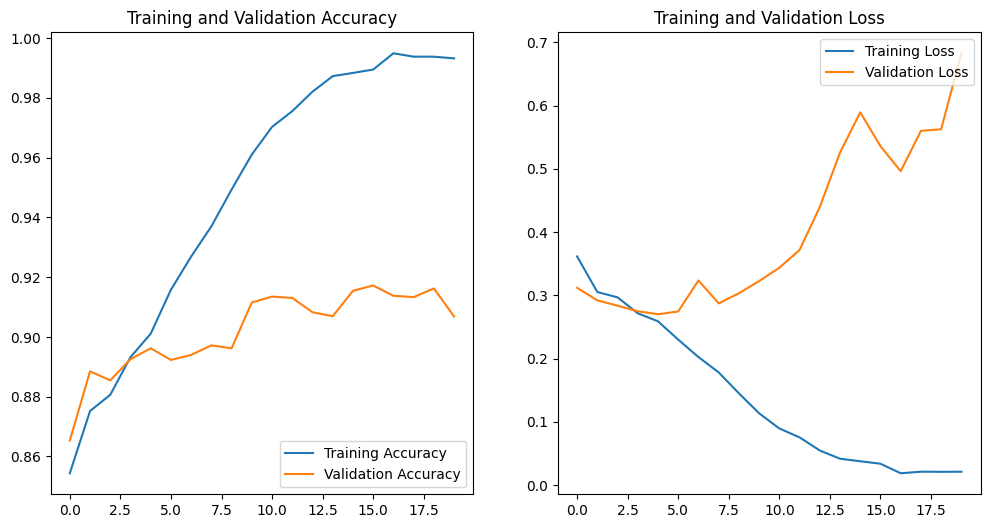

The overall Accuracy after traning: 0.9481844186782837
The overall Accuracy after Validation: 0.9021957099437714


In [45]:
#showing results and model accuracy 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(num_epochs)

plt.figure(figsize=(12, 6))
plt.grid()

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


validation_accuracy = np.mean(history.history['val_accuracy'])
accuracy = np.mean(history.history['accuracy'])

print('The overall Accuracy after traning: {}'.format(accuracy))

print('The overall Accuracy after Validation: {}'.format(validation_accuracy))


In [46]:
model=load_model("breast_cancer_classification_v2_cnn.hdf5")

In [47]:
model.evaluate(x_test,y_test)

: 

: 

In [47]:
result=model.predict(x_test)

In [19]:
training_class=["non-carcinoma","carcinoma"]
feature_list=["red","green","blue"]

In [32]:
feature_list

['red', 'green', 'blue']

In [33]:
lime_explainer = LimeTabularExplainer(x_train ,feature_names =feature_list ,
                                class_names =training_class, mode = 'classification')    


IndexError: boolean index did not match indexed array along dimension 2; dimension is 50 but corresponding boolean dimension is 3

In [ ]:
x_train[1][0][0][0]

0.9333333333333333

In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
read_img=imread("8917_idx5_x401_y651_class1.png")
read_img=resize(read_img,(50,50))

explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(
         read_img, 
         model.predict
)
plt.imshow(read_img)
image, mask = explanation.get_image_and_mask(
         model.predict(
              read_img.reshape(-1,50,50,3)
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)
plt.imshow(mark_boundaries(image, mask))



: 

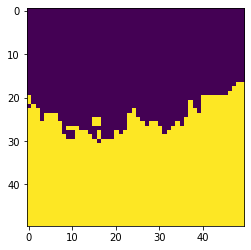

In [50]:
plt.imshow(mask)

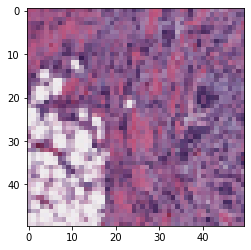

In [51]:
plt.imshow(read_img)

In [20]:
#shap
shap.initjs()
class_labels=["non-carcinoma","carcinoma"]

In [21]:
masker = shap.maskers.Image("blur(28,28)", x_train[0].shape)

explainer = shap.Explainer(model, masker, output_names=class_labels)

explainer

In [49]:
shap_values = explainer(x_test[5:9], outputs=shap.Explanation.argsort.flip[:5])

shap_values.shape


(4, 50, 50, 3, 2)

In [50]:
print(shap.__file__)

/home/hrithikpaul/.local/lib/python3.10/site-packages/shap/__init__.py


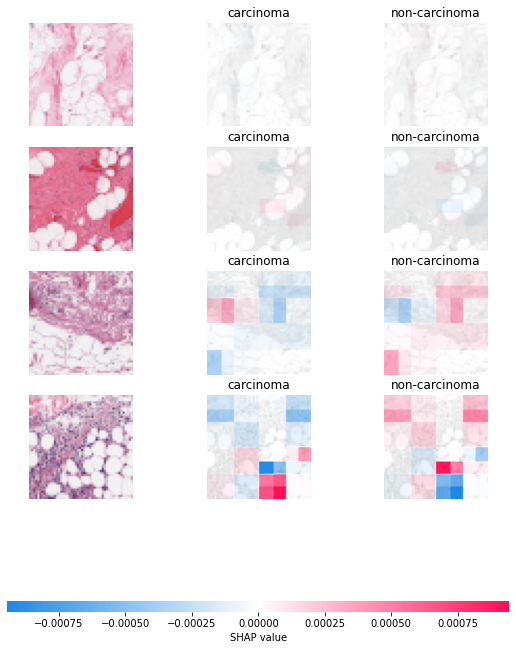

In [51]:
shap.image_plot(shap_values)

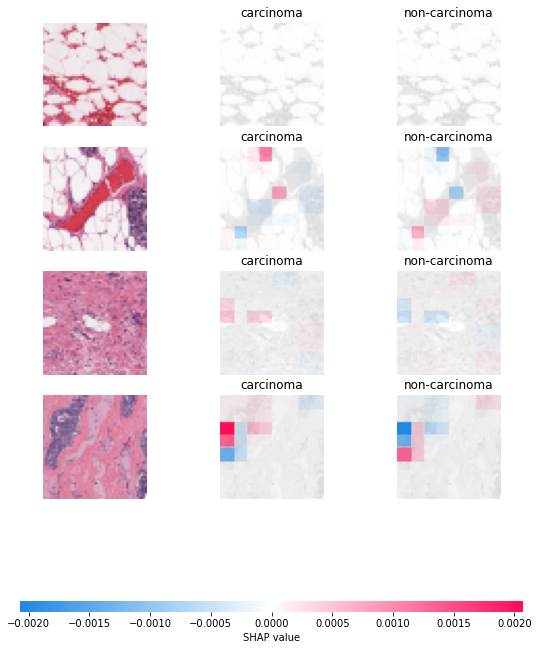

In [39]:
shap.image_plot(shap_values)

IndexError: index 2 is out of bounds for axis 0 with size 2

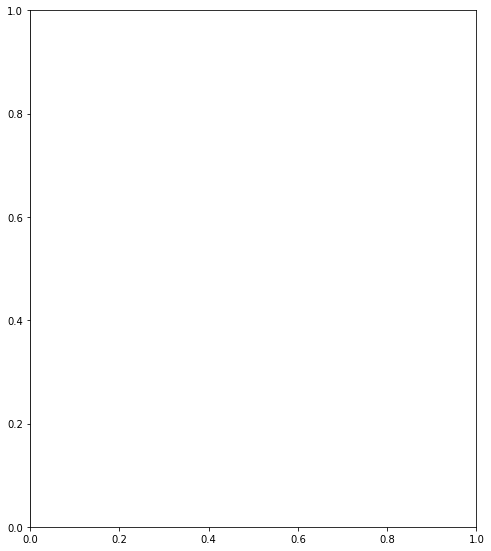

In [38]:
shap.summary_plot(shap_values,x_test[1:3],class_names=class_labels)

In [ ]:
x_train[0].shape

(50, 50, 3)

In [ ]:
       '''
        if isinstance(sliced_labels, np.ndarray) and len(sliced_labels.shape) == 2:
            if np.all(sliced_labels[0,:] == sliced_labels):
                sliced_labels = sliced_labels[0]
            '''

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score


In [ ]:
y_preb=model.predict_proba(x_test)

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


In [ ]:

auc_keras =roc_auc_score(y_test,y_preb)
auc_keras

0.9163714623803129

In [ ]:
y1=y_test.flatten()
y2=y_preb.flatten()

In [ ]:
ns_fpr, ns_tpr, _ = roc_curve(y1,y2)

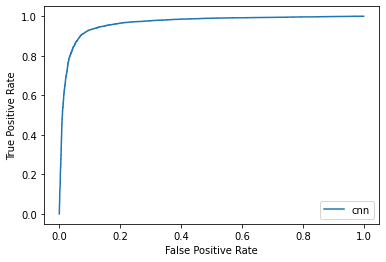

In [ ]:
plt.plot(ns_fpr, ns_tpr, linestyle='-', label='cnn')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [57]:
from sklearn.metrics import precision_recall_curve,f1_score,recall_score,classification_report, precision_score ,confusion_matrix
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print('test loss:{} \ntest acc:{}'.format(test_accuracy[0],test_accuracy[1]))
rounded_predictions = model.predict_classes(x_test, verbose=0)
print(x_test.shape,y_test.shape)
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels=rounded_labels
#print(rounded_labels.shape)
#print(rounded_predictions.shape)
rounded_predictions=rounded_predictions
#rounded_predictions=np.argmax(rounded_predictions, axis=1)
#print(rounded_predictions.shape)
cm = confusion_matrix(rounded_labels, rounded_predictions)
cm1=classification_report(rounded_labels,rounded_predictions)
print(cm)
print(cm1)
print("precision value : ",precision_score(rounded_labels,rounded_predictions))
print("recall_score : ",recall_score(rounded_labels,rounded_predictions))
print("f1-score : ",f1_score(rounded_labels,rounded_predictions))

test loss:0.2538709342479706 
test acc:0.9088333249092102


`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


(12000, 50, 50, 3) (12000, 2)
[[ 982  887]
 [ 207 9924]]
              precision    recall  f1-score   support

           0       0.83      0.53      0.64      1869
           1       0.92      0.98      0.95     10131

    accuracy                           0.91     12000
   macro avg       0.87      0.75      0.80     12000
weighted avg       0.90      0.91      0.90     12000

precision value :  0.9179539358061234
recall_score :  0.9795676636067515
f1-score :  0.9477604813293858


In [ ]:
print(precision_score(y_test,result))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets